In [1]:
library(tidyr)
library(ggplot2)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


# ncbi 15 genes expression

In [175]:
GeneID <- c('11459','12313','12314','12317','12631','14319','14433','15254','15516','16852','17904','18674','218490','22027','22070','67248')
GeneName <- c('Acta1','Calm1','Calm2','Calr','Cfl1','Fth1','Gapdh','Hint1','Hsp90ab1','Lgals1','Myl6','Slc25a3','Btf3','Hsp90b1','Tpt1','Rpl39')
GeneInfo <- data.frame(row.names=GeneID,GeneName=GeneName)
GeneInfo

,GeneName
,<chr>
11459,Acta1
12313,Calm1
12314,Calm2
12317,Calr
12631,Cfl1
14319,Fth1
14433,Gapdh
15254,Hint1
15516,Hsp90ab1


In [176]:
files <- grep('GeneID',list.files('/syn1/liangzhen/jinhua_jilab_project/data/bulkRNA_15X/F1S-15x_expression'),value = T)

In [177]:
exp_all <- c()
for (file in files){
    exp <- read.table(paste0('/syn1/liangzhen/jinhua_jilab_project/data/bulkRNA_15X/F1S-15x_expression/',file),skip = 1,row.names = 1,
           header=T,check.names = F,comment.char = "",sep='\t')
    colnames(exp) <- gsub(' ','_',colnames(exp))
    exp_all <- rbind(exp_all,exp)
}
exp_all <- exp_all[,1:30]

In [178]:
colnames(exp_all)

[1] "CNS_E11.5"                  "CNS_E14"                   
 [3] "CNS_E18"                    "Large_Intestine_adult"     
 [5] "adrenal_adult"              "bladder_adult"             
 [7] "cerebellum_adult"           "colon_adult"               
 [9] "cortex_adult"               "duodenum_adult"            
[11] "frontal_Lobe_adult"         "genital_fat_pad_adult"     
[13] "heart_adult"                "kidney_adult"              
[15] "limb_E14.5"                 "liver_E14"                 
[17] "liver_E14.5"                "liver_E18"                 
[19] "liver_adult"                "lung_adult"                
[21] "mammary_gland_adult"        "ovary_adult"               
[23] "placenta_adult"             "small_intestine_adult"     
[25] "spleen_adult"               "stomach_adult"             
[27] "subcutaneous_fat_pad_adult" "testis_adult"              
[29] "thymus_adult"               "whole_brain_E14.5"

In [179]:
exp_all$GeneID <- as.character(rownames(exp_all))

In [180]:
exp_all_long <- as.data.frame(pivot_longer(data = exp_all,cols = -c('GeneID'),names_to = 'tissue',values_to = 'RPKM'))
exp_all_long

GeneID,tissue,RPKM
<chr>,<chr>,<dbl>
11459,CNS_E11.5,8.330
11459,CNS_E14,17.600
11459,CNS_E18,36.800
11459,Large_Intestine_adult,9.700
11459,adrenal_adult,1.440
11459,bladder_adult,558.000
11459,cerebellum_adult,1.570
11459,colon_adult,10.100
11459,cortex_adult,6.800


In [181]:
exp_all_long$GeneName <- GeneInfo[exp_all_long$GeneID,'GeneName']

In [182]:
exp_all_long

GeneID,tissue,RPKM,GeneName
<chr>,<chr>,<dbl>,<chr>
11459,CNS_E11.5,8.330,Acta1
11459,CNS_E14,17.600,Acta1
11459,CNS_E18,36.800,Acta1
11459,Large_Intestine_adult,9.700,Acta1
11459,adrenal_adult,1.440,Acta1
11459,bladder_adult,558.000,Acta1
11459,cerebellum_adult,1.570,Acta1
11459,colon_adult,10.100,Acta1
11459,cortex_adult,6.800,Acta1


In [146]:
exp_all_long$GeneName <- factor(exp_all_long$GeneName,levels = c('Gapdh','Acta1','Hsp90b1','Calr','Cfl1','Myl6','Rpl39','Calm2','Fth1','Hsp90ab1','Tpt1','Slc25a3','Lgals1','Btf3','Hint1','Calm1'))

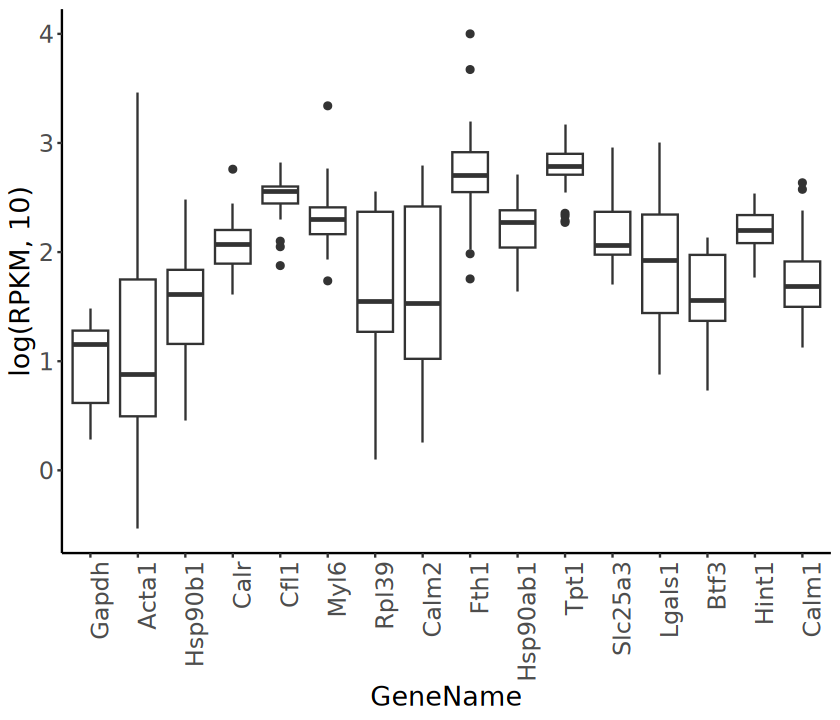

In [147]:
#pdf('/syn1/liangzhen/jinhua_jilab_project/script/bulk_RNA/NCBI_15x_expression.pdf',width=7,height=6)
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(exp_all_long,aes(x=GeneName,y=log(RPKM,10))) + geom_boxplot()+
    #geom_point(data = exp_all_long[exp_all_long$tissue == 'lung_adult',],
    #           aes(x=GeneName,y=log(RPKM,10)),color='red',shape = "*",size = 6)+
    theme_classic()+
      theme(
    axis.title.x = element_text(size = 16),   
    axis.title.y = element_text(size = 16),   
    axis.text.x = element_text(size = 14,angle = 90, hjust = 1),    
    axis.text.y = element_text(size = 14),    
    legend.title = element_text(size = 16),   
    legend.text = element_text(size = 14),   
  )
#dev.off()

# EP

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


In [2]:
rpkm <- function(counts, lengths) {  #http://ny-shao.name/2016/11/18/a-short-script-to-calculate-rpkm-and-tpm-from-featurecounts-output.html
  rate <- counts / lengths
  rate / sum(counts) * 1e9
}

ftr.cnt1 <- read.table('/syn1/liangzhen/jinhua_jilab_project/data/EPC_bulkRNA/featureCounts/featureCounts.txt', 
                      sep="\t", stringsAsFactors=FALSE,header=TRUE,check.names=F)

ftr.rpkm1 <- ftr.cnt1 %>%
  gather(sample, cnt, 7:ncol(ftr.cnt1)) %>%
  group_by(sample) %>%
  mutate(rpkm=rpkm(cnt, Length)) %>%
  select(-cnt) %>%
  spread(sample, rpkm)

In [3]:
ftr.rpkm1 <- as.data.frame(ftr.rpkm1)
rownames(ftr.rpkm1) <- ftr.rpkm1$Geneid
ftr.rpkm1 <- ftr.rpkm1[,7:ncol(ftr.rpkm1)]
colnames(ftr.rpkm1) <- gsub("/syn1/liangzhen/jinhua_jilab_project/data/EPC_bulkRNA/hisat2/|.sorted.bam",'',colnames(ftr.rpkm1))


In [4]:
bulk_gene_exp <- as.data.frame(apply(ftr.rpkm1[c('Gapdh','Acta1','Hsp90b1','Calr','Rpl39','Cfl1','Myl6','Calm2','Hsp90ab1','Fth1','Hint1','Tpt1','Lgals1','Slc25a3','Calm1','Btf3'),],1,median))
colnames(bulk_gene_exp) <- 'RPKM'
bulk_gene_exp$RPKM <- log(bulk_gene_exp$RPKM,10)
bulk_gene_exp

,RPKM
,<dbl>
Gapdh,3.106914
Acta1,-1.732842
Hsp90b1,2.248636
Calr,2.465892
Rpl39,1.900955
Cfl1,3.071884
Myl6,2.566019
Calm2,2.417637
Hsp90ab1,3.117754


In [5]:
sc_gene_exp <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/15gene_exp.csv',sep=',',header=T)
rownames(sc_gene_exp) <- sc_gene_exp$Gene
sc_gene_exp

,Gene,median_value
,<chr>,<dbl>
Gapdh,Gapdh,3.456484
Acta1,Acta1,0.000000
Hsp90b1,Hsp90b1,1.559453
Calr,Calr,1.367469
Rpl39,Rpl39,3.320943
Cfl1,Cfl1,2.075292
Myl6,Myl6,2.082785
Calm2,Calm2,1.555191
Hsp90ab1,Hsp90ab1,3.520245


In [6]:
bulk_gene_exp$sc_exp <- sc_gene_exp[rownames(bulk_gene_exp),'median_value']

In [7]:
bulk_gene_exp$GeneName <- rownames(bulk_gene_exp)
bulk_gene_exp

,RPKM,sc_exp,GeneName
,<dbl>,<dbl>,<chr>
Gapdh,3.106914,3.456484,Gapdh
Acta1,-1.732842,0.000000,Acta1
Hsp90b1,2.248636,1.559453,Hsp90b1
Calr,2.465892,1.367469,Calr
Rpl39,1.900955,3.320943,Rpl39
Cfl1,3.071884,2.075292,Cfl1
Myl6,2.566019,2.082785,Myl6
Calm2,2.417637,1.555191,Calm2
Hsp90ab1,3.117754,3.520245,Hsp90ab1


In [8]:
library(ggrepel)

png 
  2

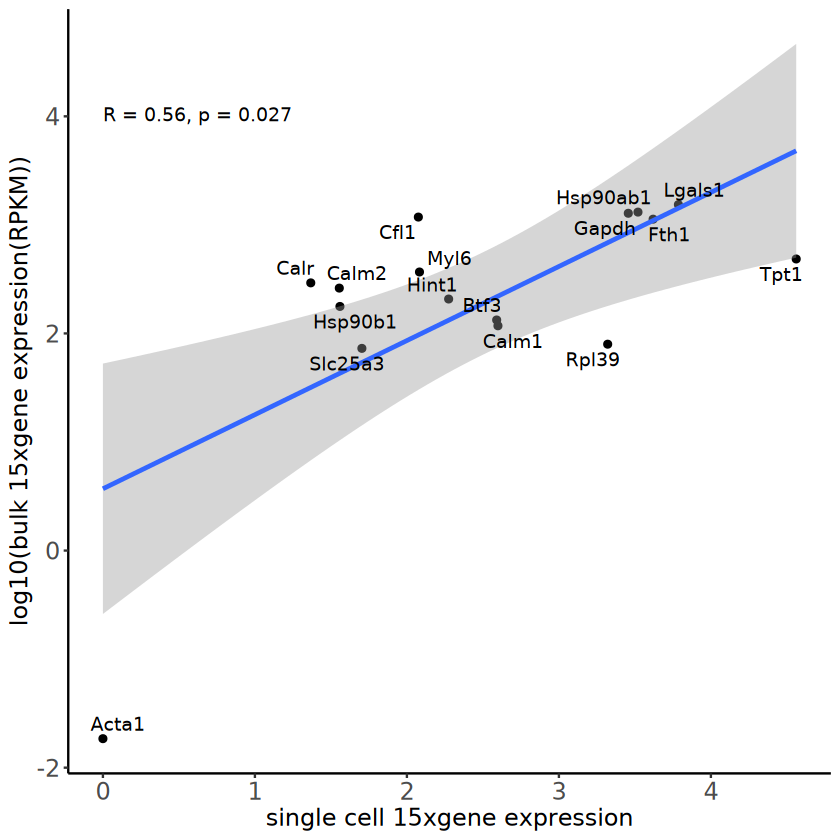

In [15]:
pdf('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/15x_gene_expression_bulk_VS_single.pdf',width=6,height=6)
plot <- ggplot(bulk_gene_exp,aes(x=sc_exp,y=RPKM)) + geom_point()+ theme_classic()+
    xlab('single cell 15xgene expression')+ylab('log10(bulk 15xgene expression(RPKM))')+
    geom_smooth(method = "lm", formula = y ~ x)+
stat_cor(method = "spearman",label.x = 0,label.y = 4) +
geom_text_repel(aes(x=sc_exp,y=RPKM,label=GeneName))+ 
theme(axis.title=element_text(size=14),axis.text = element_text(size = 14))
print(plot)
dev.off()
print(plot)